In [ ]:
#Student Names and ID: Jiachen Liu (1010182204)
#Instructor Name: Professor Shion Guha
#Course Code: INF2178
#Course Name: Experimental Design for Data Science
#Program: Master of Information
#Faculty: Faculty of Information
#School: University of Toronto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#load libraries that are needed to conduct the data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg
from scipy.stats import shapiro, levene
from statsmodels.formula.api import mixedlm
from statsmodels.stats.power import TTestIndPower

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.1 MB/s eta 0:00:00


In [3]:
#read the "data" tab of the data excel into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/inf2178/A4/INF2178_A4_data.csv')

#print the number of datapoints in this DataFrame
print("Number of datapoints:", len(data))

#display the first few rows of the DataFrame
data.head()

Number of datapoints: 294


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [4]:
#display the basic information of the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


**From the above information, we know that there's some cleaning to do before conducting the analysis.**

**a.drop the column "Unnamed:0"**

**b.handle with the missing values in "SES" and "MMSE" columns**

**c.convert the datatypes of certain columns that're possible to be categorical variables to category**

**1.Data Cleaning**

In [5]:
#a. drop the column "Unmaed:0"
data.drop(columns=["Unnamed: 0"], inplace = True)

In [6]:
#b.for both columns, fill in the missing values with each own mean
data["SES"].fillna(data["SES"].mean(), inplace = True)
#for MMSE, fill missing values with the mean
data["MMSE"].fillna(data["MMSE"].mean(), inplace = True)

In [61]:
#c.convent datatypes
data["Group"] = data["Group"].astype("category")
data["M/F"] = data["M/F"].astype("category")
data["Hand"] = data["Hand"].astype("category")

In [37]:
#get inforation about the descriptive statistics for each numerical columns
data.describe()

,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,400.741520,7.607074,2.884818,1.098754,3.407624,0.381347,176.559755,0.037373,0.139365
min,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**2.Exploratory Data Analysis**

**a.What's the counts for each categorical column?**

**b.What's the distribution of sex in each dementia group?**

**c.What's the distribution of MMSE scores by sex and visit times?**

**d.How do educational level (EDUC), socioeconomic status (SES), Mini-Mental State Examination (MMSE) scores, and Clinical Dementia Rating (CDR) scores vary across different dementia statuses (nondemented, demented, converted)?**


In [63]:
#a.What's the counts for each categorical column?

#display category counts for the categorical columns
categorical_columns = ["Group", "M/F", "Hand"]
#check counts for each column
for column in categorical_columns:
  print(f"Column: {column}")
  print(data[column].value_counts())
  print("\n")

Column: Group
Group
Nondemented    142
Demented       126
Converted       26
Name: count, dtype: int64


Column: M/F
M/F
F    173
M    121
Name: count, dtype: int64


Column: Hand
Hand
R    294
Name: count, dtype: int64




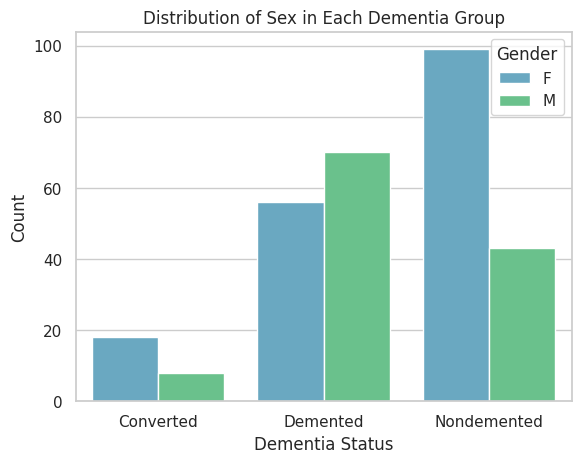

In [39]:
#b.What's the distribution of sex in each dementia group?

fig, ax = plt.subplots()
sns.countplot(x="Group", hue="M/F", data=data, palette=["#5CAECF", "#5CCF89"], ax=ax)

#set the title and labels
plt.title("Distribution of Sex in Each Dementia Group")
plt.xlabel("Dementia Status")
plt.ylabel("Count")
plt.legend(title="Gender")

plt.show()

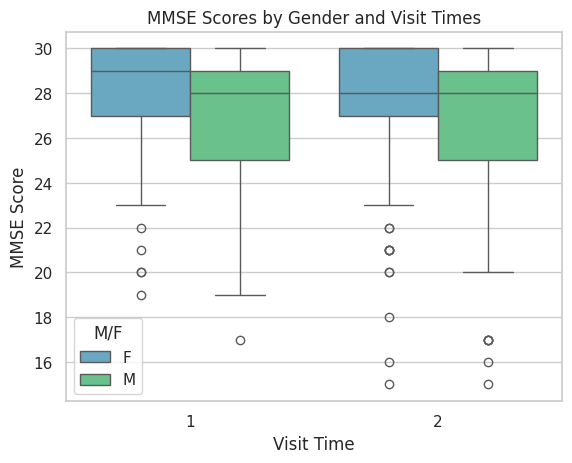

In [40]:
#c.What's the distribution of MMSE scores by sex and visit times?
#For this, we can create a box plot.

sns.boxplot(x="Visit", y="MMSE", hue="M/F", data=data, palette=["#5CAECF", "#5CCF89"])

#set the title and labels
plt.title("MMSE Scores by Gender and Visit Times")
plt.xlabel("Visit Time")
plt.ylabel("MMSE Score")

plt.show()

<ipython-input-41-2788436d5fba>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="EDUC", data=data, ax=axs[0, 0], palette=custom_palette)
<ipython-input-41-2788436d5fba>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="SES", data=data, ax=axs[0, 1], palette=custom_palette)
<ipython-input-41-2788436d5fba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="MMSE", data=data, ax=axs[1, 0], palette=custom_palette)
<ipython-input-41-2788436d5fba>:23: FutureWarning: 

Passing `palette` without assigning `hu

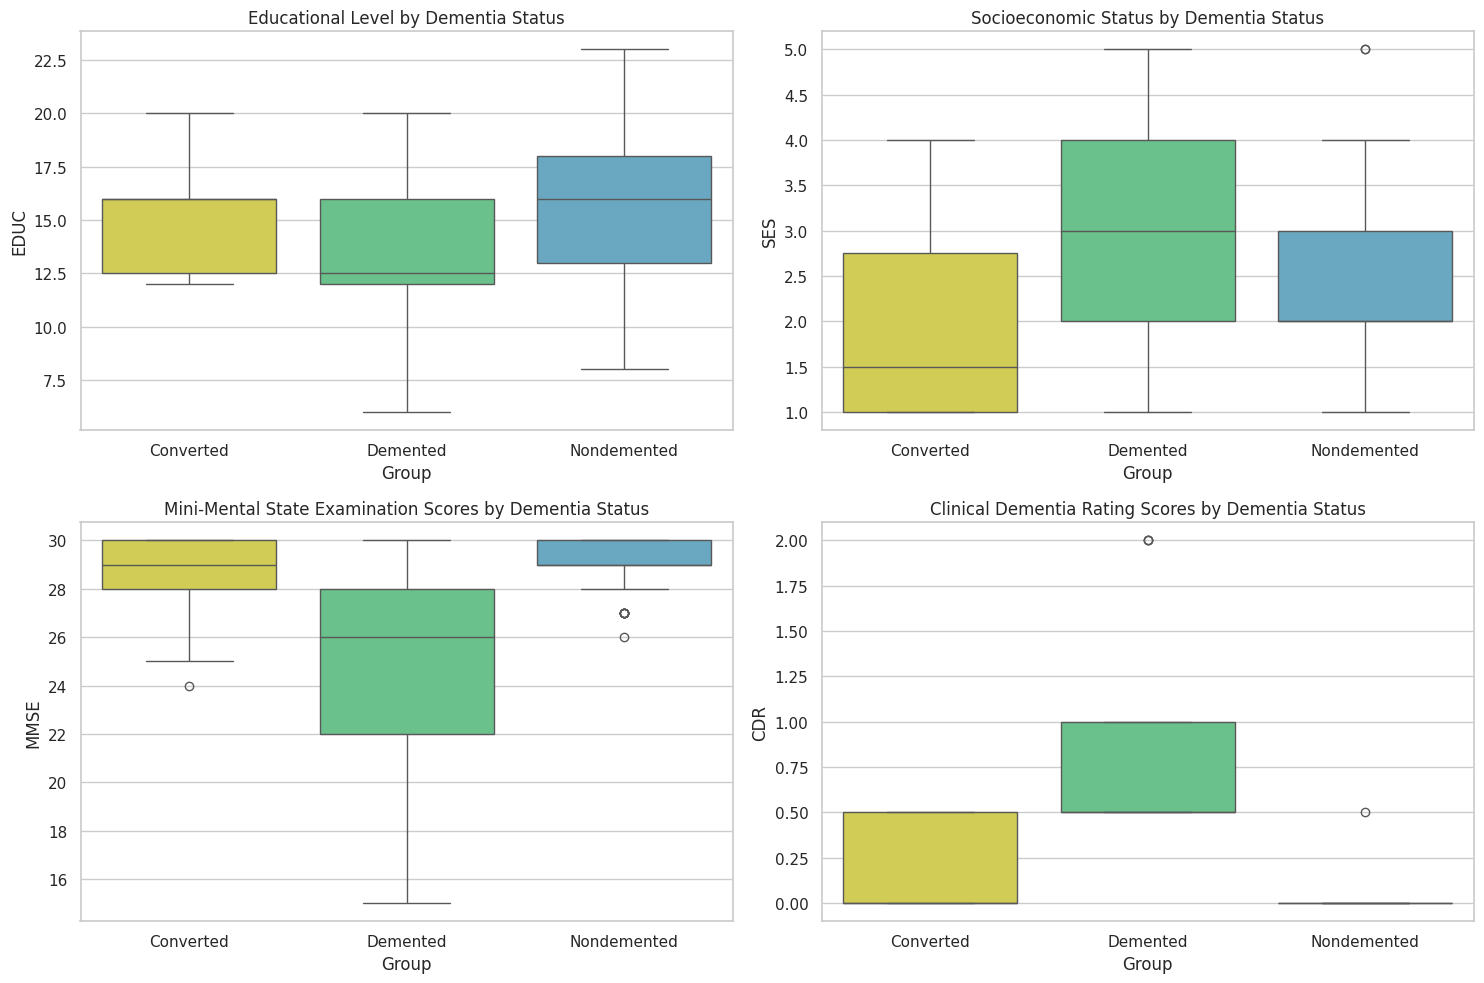

In [41]:
#d.How do educational level (EDUC), socioeconomic status (SES), Mini-Mental State Examination (MMSE) scores,
#and Clinical Demential Rating (CDR) scores vary across different dementia statuses (nondemented, demented, coverted)?

custom_palette = {"Nondemented": "#5CAECF", "Demented": "#5CCF89","Converted": "#E4DF42"}

#setting up the figure for a 3x3 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#making the plots
#Educational Level by Dementia Status
sns.boxplot(x="Group", y="EDUC", data=data, ax=axs[0, 0], palette=custom_palette)
axs[0, 0].set_title("Educational Level by Dementia Status")

#Socioeconomic Status by Dementia Status
sns.boxplot(x="Group", y="SES", data=data, ax=axs[0, 1], palette=custom_palette)
axs[0, 1].set_title("Socioeconomic Status by Dementia Status")

#Mini-Mental State Examination Scores by Dementia Status
sns.boxplot(x="Group", y="MMSE", data=data, ax=axs[1, 0], palette=custom_palette)
axs[1, 0].set_title("Mini-Mental State Examination Scores by Dementia Status")

#Clinical Dementia Rating Scores by Dementia Status
sns.boxplot(x='Group', y='CDR', data=data, ax=axs[1, 1], palette=custom_palette)
axs[1, 1].set_title('Clinical Dementia Rating Scores by Dementia Status')

plt.tight_layout()
plt.show()

**3.Mixed Effects ANOVA Analysis**

**To conduct the mixed effects ANOVA, my research questions is:**

How do MMSE scores vary across different dementia statuses (nondemented, demented, converted), and do these variations interact significantly between two visits?

H0 (Null Hypothesis):

-There is no significant difference in MMSE scores across different dementia statuses (nondemented, demented, converted).

-There is no significant interaction between dementia status and two visit times on MMSE scores.

H1 (Alternative Hypothesis):

-There is a significant difference in MMSE scores across different dementia statuses.

-There is a significant interaction between dementia status and two visit times on MMSE scores.

In [42]:
#define the mixed ANOVA model
aov = pg.mixed_anova(dv="MMSE", within ="Visit", between="Group", subject="Subject ID", data=data)
#print above anova summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1322.017      2    141  661.009  56.100    0.000  0.443  nan
Visit          21.528      1    141   21.528   8.525    0.004  0.057    1.000
Interaction    16.204      2    141    8.102   3.208    0.043  0.044  nan



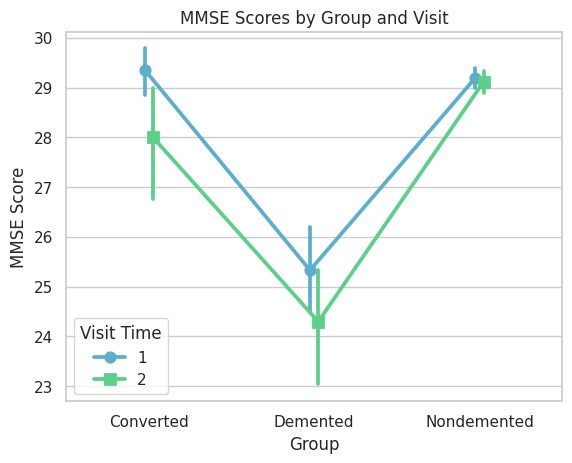

In [43]:
#Output plot of this mixed effects ANOVA model

palette = ["#5CAECF", "#5CCF89"]
sns.pointplot(data=data, x="Group", y="MMSE", hue="Visit", dodge=True, markers=["o", "s"], palette=palette)
plt.title("MMSE Scores by Group and Visit")
plt.xlabel("Group")
plt.ylabel("MMSE Score")
plt.legend(title="Visit Time")
plt.show()

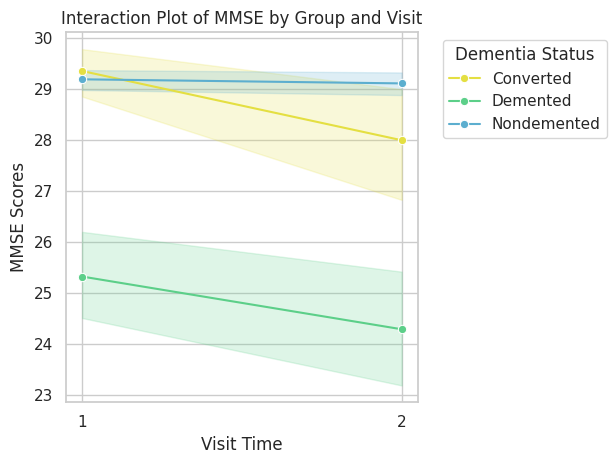

In [47]:
#Use an interaction plot to visualize the statistically significant interaction between group and visit times
palette = {"Nondemented": "#5CAECF", "Demented": "#5CCF89", "Converted": "#E4DF42"}

sns.lineplot(data=data, x="Visit", y="MMSE", hue="Group", marker="o",palette=palette)
plt.xticks([1, 2], ["1", "2"])
plt.xlabel("Visit Time")
plt.ylabel("MMSE Scores")
plt.title("Interaction Plot of MMSE by Group and Visit")
plt.legend(title="Dementia Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

It's also important to check the assumptions for the ANOVA model


In [48]:
#3.1 Using Shapiro-Wilk Test to check for Normality of Residuals
pg.normality(data=data, dv="MMSE", group="Visit")

,W,pval,normal
Visit,,,
1,0.787462,1.761304e-13,False
2,0.761121,4.941331e-14,False


In [49]:
#3.2 Using Levene's test to check for Homegeneity of Variances
levene_test = pg.homoscedasticity(data=data, dv="MMSE", group="Group", method="levene")
levene_test

,W,pval,equal_var
levene,64.643002,5.897159e-24,False


In [50]:
#Post-Hoc Test to see which specific groups differ from each other.
posthocs = pg.pairwise_tests(dv="MMSE", within ="Visit", between="Group", subject="Subject ID", data=data)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.876  143.000  two-sided        0.005               4.793     0.159
Group          -        Converted  Demented     False     True           6.745   50.480  two-sided        0.000         2189000.000     1.164
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.512   65.514  two-sided        0.000  33060000000000.000    -1.745
Visit * Group  1        Converted  Demented     False     True           8.076   60.165  two-sided        0.000       447900000.000

**4.Statistical Power Analysis Plot**

In [54]:
#parameters for the power analysis given by the requirement
effect_size = 0.7
alpha = 0.05
power = 0.91

#create an instance of TTestIndPower
test = TTestIndPower()

#calculate the sample size needed
sample_size = test.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative="two-sided")
print(f"Required sample size: {sample_size:.3f}")

Required sample size: 45.451


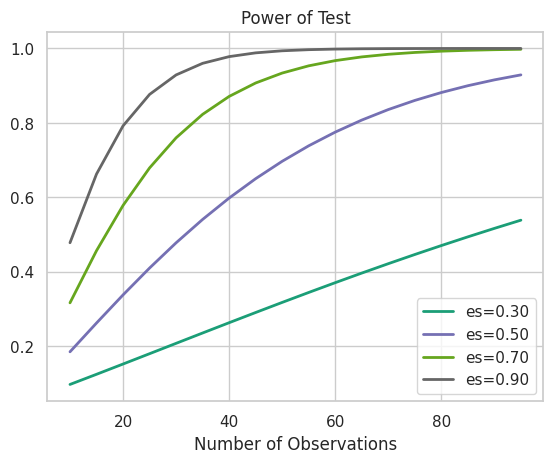

In [58]:
#plot the power curves
#generate a range of sample sizes for plotting
sample_sizes = np.arange(10, 100, 5)

test = TTestIndPower()
power_curve = test.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=np.array([0.3, 0.5, 0.7, 0.9]), alpha=0.05)

plt.show()